In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/fraud.csv')

cols = ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']

for col in cols:
    if col in df.columns:
        df[col] = df[col].astype('string').str.strip().str.strip("'").str.strip('"')
        
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0
594639,179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0
594640,179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0
594641,179,C1499363341,5,M,28007,M1823072687,28007,es_transportation,14.46,0


Fraud value counts:
 fraud
0    587443
1      7200
Name: count, dtype: int64

Fraud class distribution (%):
 fraud
0    98.789189
1     1.210811
Name: proportion, dtype: float64


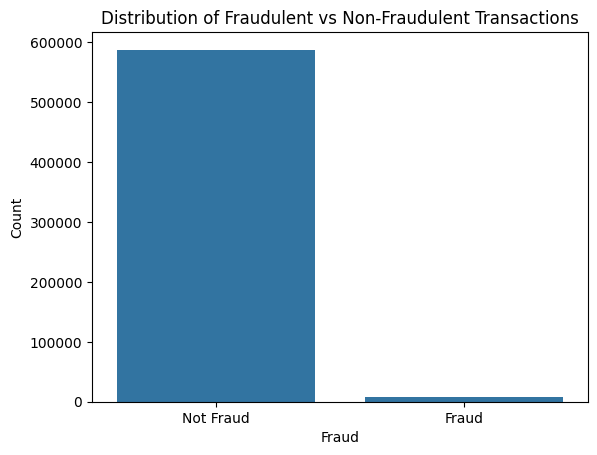

In [3]:
fraud_counts = df['fraud'].value_counts()
fraud_percent = df['fraud'].value_counts(normalize=True) * 100

print("Fraud value counts:\n", fraud_counts)
print("\nFraud class distribution (%):\n", fraud_percent)

sns.countplot(x='fraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()

/Users/rakanarmoush/Desktop/case-study/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/rakanarmoush/Desktop/case-study/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/rakanarmoush/Desktop/case-study/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


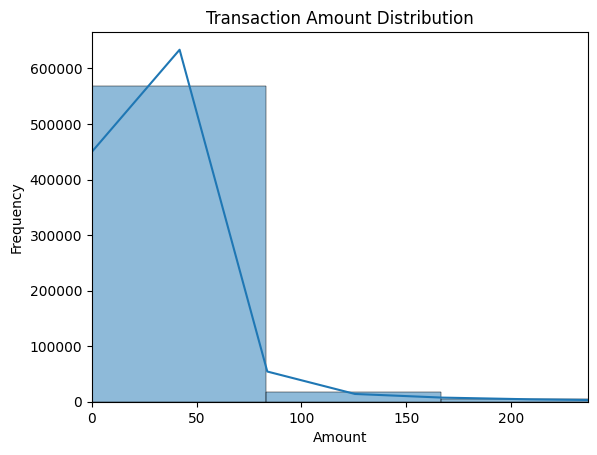

In [4]:
sns.histplot(df['amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, df['amount'].quantile(0.99))
plt.show()

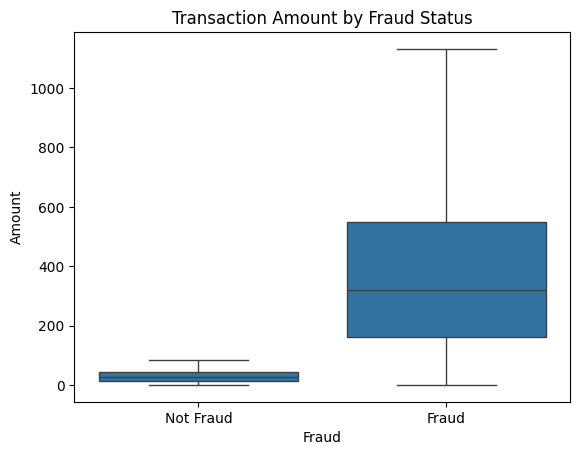

In [5]:
sns.boxplot(x='fraud', y='amount', data=df, showfliers=False)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()

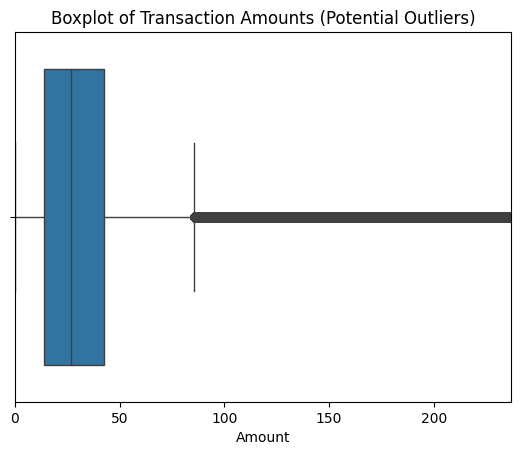

In [6]:
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts (Potential Outliers)')
plt.xlabel('Amount')
plt.xlim(0, df['amount'].quantile(0.99))
plt.show()

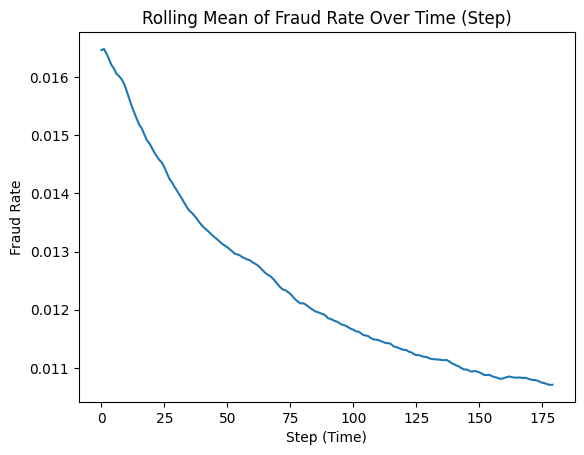

In [7]:
fraud_by_step = df.groupby('step')['fraud'].mean()
fraud_by_step.rolling(window=10, min_periods=1).mean().plot()
plt.title('Rolling Mean of Fraud Rate Over Time (Step)')
plt.xlabel('Step (Time)')
plt.ylabel('Fraud Rate')
plt.show()

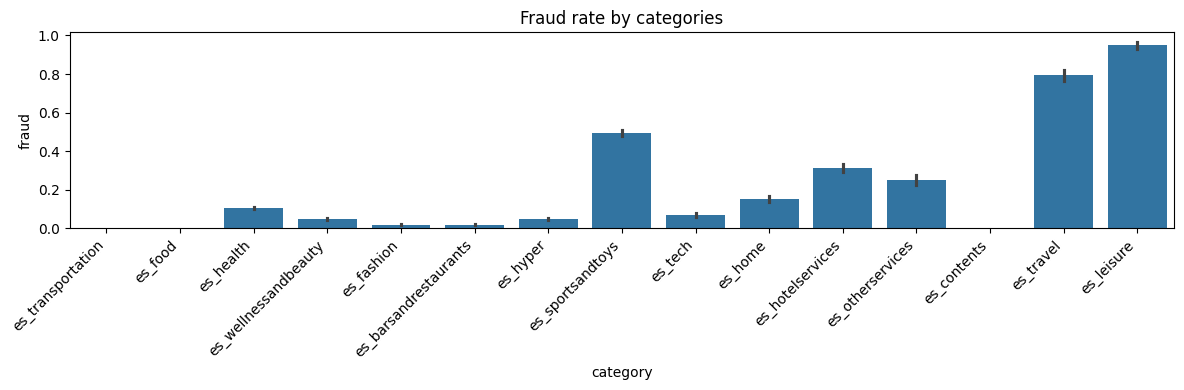

In [8]:
top_cats = df['category'].value_counts().index
cat_df = df[df['category'].isin(top_cats)].copy()
order = cat_df['category'].value_counts().index
plt.figure(figsize=(12, 4))
sns.barplot(x='category', y='fraud', data=cat_df, order=order, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud rate by categories')
plt.tight_layout()
plt.show()

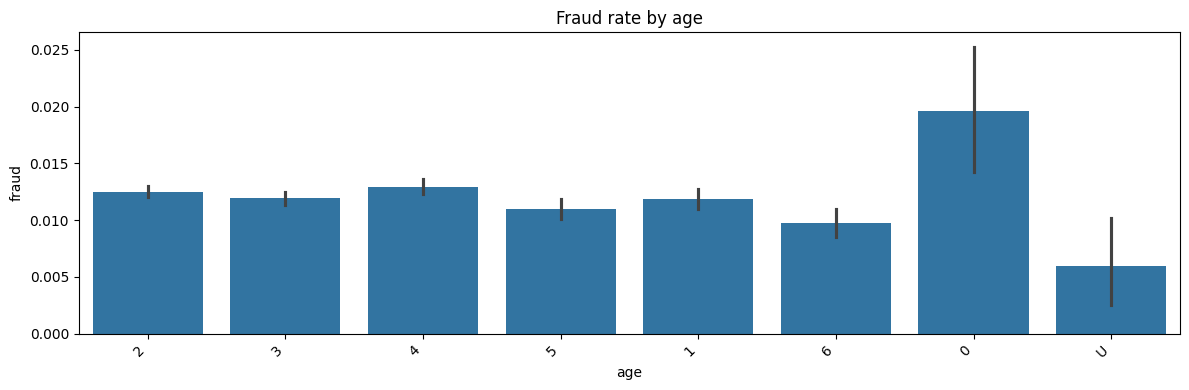

In [9]:
top_cats = df['age'].value_counts().index
cat_df = df[df['age'].isin(top_cats)].copy()
order = cat_df['age'].value_counts().index
plt.figure(figsize=(12, 4))
sns.barplot(x='age', y='fraud', data=cat_df, order=order, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud rate by age')
plt.tight_layout()
plt.show()

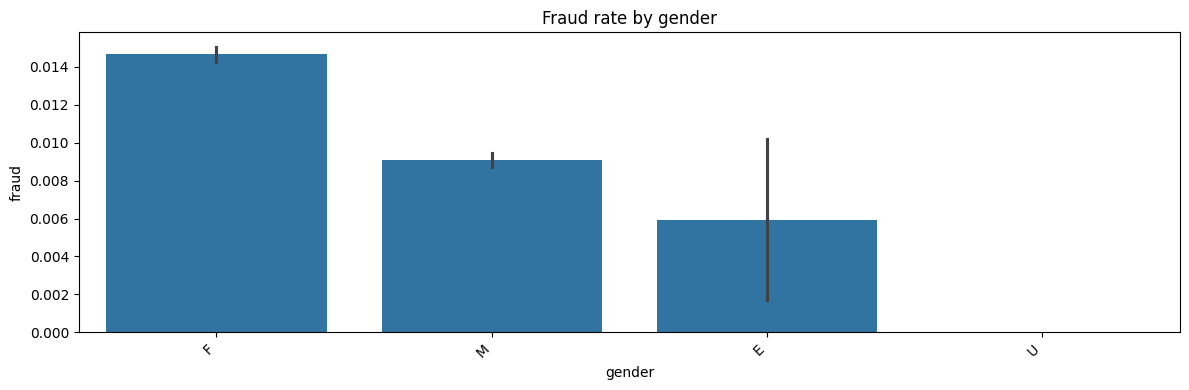

In [10]:
top_cats = df['gender'].value_counts().index
cat_df = df[df['gender'].isin(top_cats)].copy()
order = cat_df['gender'].value_counts().index
plt.figure(figsize=(12, 4))
sns.barplot(x='gender', y='fraud', data=cat_df, order=order, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud rate by gender')
plt.tight_layout()
plt.show()

In [11]:
df.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [12]:
df.zipcodeOri.describe()

count     594643
unique         1
top        28007
freq      594643
Name: zipcodeOri, dtype: object

In [13]:
df.zipMerchant.describe()

count     594643
unique         1
top        28007
freq      594643
Name: zipMerchant, dtype: object

In [14]:
df[df['age'] == 'U'].gender.value_counts()

gender
E    1178
Name: count, dtype: Int64

In [15]:
df = df.drop(columns=['zipcodeOri', 'zipMerchant'])
df['age'] = df['age'].replace('U', "ent")


In [16]:
age_dummies = pd.get_dummies(df['age'], prefix='age', dtype='uint8')
gender_dummies = pd.get_dummies(df['gender'], prefix='gender', dtype='uint8')
category_dummies = pd.get_dummies(df['category'], prefix='category', dtype='uint8')
merchant_dummies = pd.get_dummies(df['merchant'], prefix='merchant', dtype='uint8')

df = pd.concat([df.drop(columns=['age']), age_dummies], axis=1)
df = pd.concat([df.drop(columns=['gender']), gender_dummies], axis=1)
df = pd.concat([df.drop(columns=['category']), category_dummies], axis=1)
df = pd.concat([df, merchant_dummies], axis=1)

df

,step,customer,merchant,amount,fraud,age_0,age_1,age_2,age_3,age_4,...,merchant_M732195782,merchant_M78078399,merchant_M840466850,merchant_M855959430,merchant_M857378720,merchant_M85975013,merchant_M923029380,merchant_M933210764,merchant_M97925176,merchant_M980657600
0,0,C1093826151,M348934600,4.55,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,C352968107,M348934600,39.68,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,C2054744914,M1823072687,26.89,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,C1760612790,M348934600,17.25,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,C757503768,M348934600,35.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,M1823072687,20.53,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
594639,179,C650108285,M1823072687,50.73,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
594640,179,C123623130,M349281107,22.44,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,C1499363341,M1823072687,14.46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


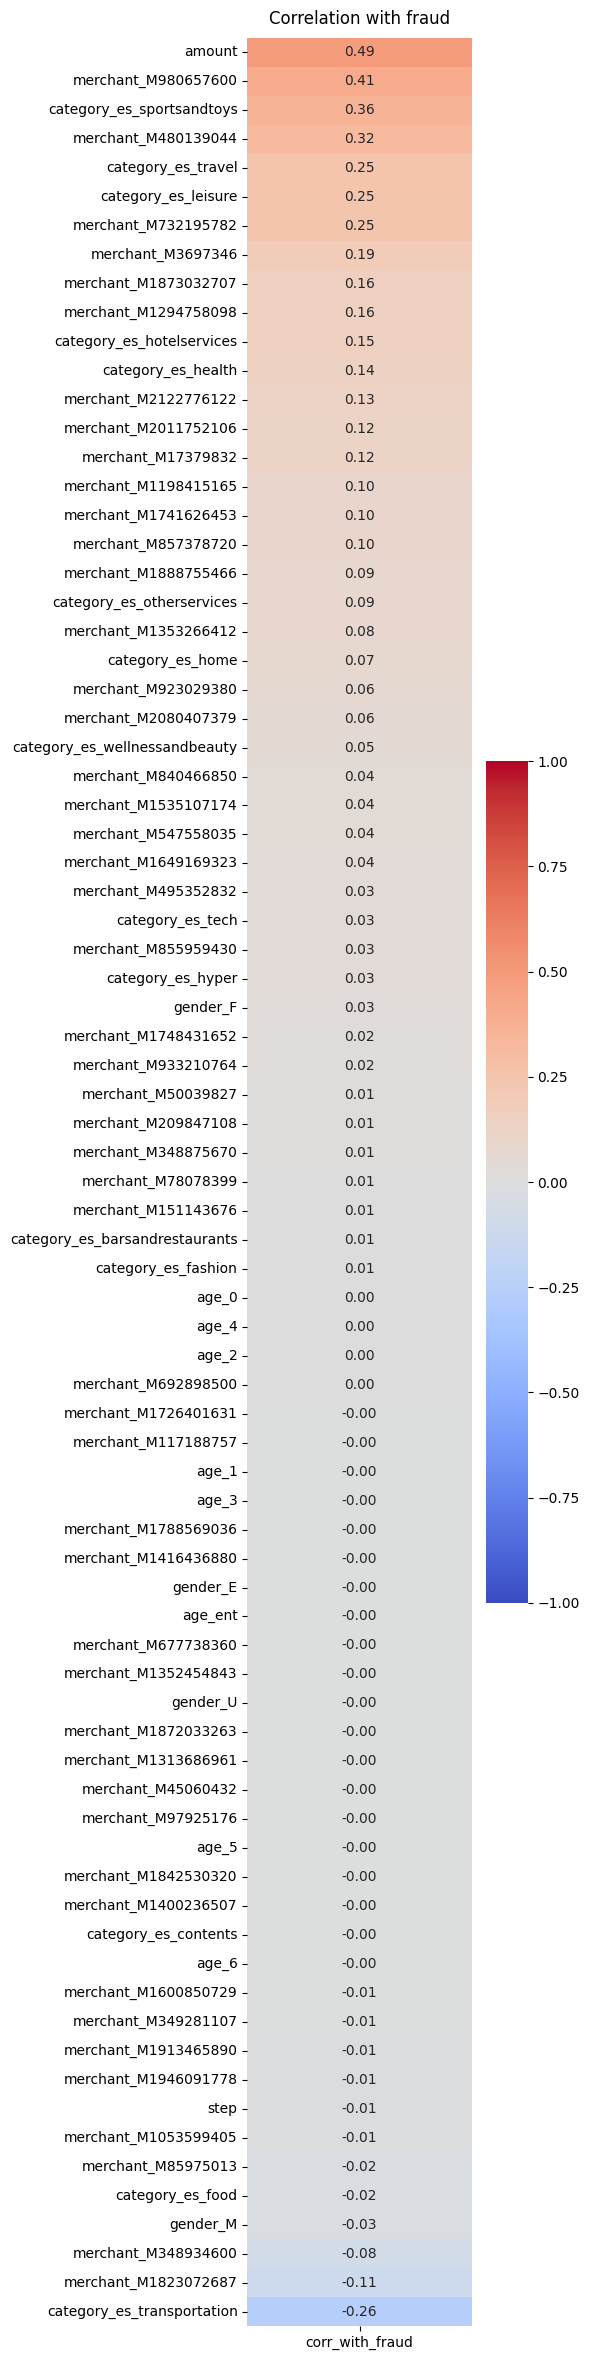

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

non_constant = [c for c in numeric_cols if df[c].nunique() > 1]
corr = df[non_constant].corr()['fraud'].drop(labels=['fraud'], errors='ignore')

corr = corr.dropna()

corr_sorted = corr.sort_values(ascending=False)
corr_df = corr_sorted.to_frame(name='corr_with_fraud')

plt.figure(figsize=(6, max(4, len(corr_df) * 0.3))) 
ax = sns.heatmap(
    corr_df,
    annot=True, fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1, center=0,          
)
ax.set_title('Correlation with fraud', pad=10)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud'])
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Add SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

# Drop non-feature columns for training
X_train_temp_features = X_train_temp.drop(columns=['customer', 'merchant', 'step'])
X_test_temp_features = X_test_temp.drop(columns=['customer', 'merchant', 'step'])

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_temp_features, y_train_temp)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_smote, y_train_smote)

y_test_pred = logreg.predict(X_test_temp_features)
y_test_proba = logreg.predict_proba(X_test_temp_features)[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results (with SMOTE):")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")



Temporal Test Set Results (with SMOTE):
Test F1: 0.5960
Test ROC-AUC: 0.9962
Test PR-AUC: 0.7932
Test Precision: 0.4422
Test Recall: 0.9141


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_temp.drop(columns=['customer', 'merchant', 'step']), y_train_temp)

y_test_pred = logreg.predict(X_test_temp.drop(columns=['customer', 'merchant', 'step']))
y_test_proba = logreg.predict_proba(X_test_temp.drop(columns=['customer', 'merchant', 'step']))[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results:")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")



Temporal Test Set Results:
Test F1: 0.7821
Test ROC-AUC: 0.9980
Test PR-AUC: 0.9004
Test Precision: 0.9447
Test Recall: 0.6672


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

# Drop non-feature columns
X_train_features = X_train_temp.drop(columns=['customer', 'merchant', 'step'])
X_test_features = X_test_temp.drop(columns=['customer', 'merchant', 'step'])

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_features, y_train_temp)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

y_test_pred = rf.predict(X_test_features)
y_test_proba = rf.predict_proba(X_test_features)[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results (Random Forest + SMOTE):")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")



Temporal Test Set Results (Random Forest + SMOTE):
Test F1: 0.7668
Test ROC-AUC: 0.9558
Test PR-AUC: 0.8089
Test Precision: 0.8177
Test Recall: 0.7219


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_temp.drop(columns=['customer', 'merchant', 'step']), y_train_temp)

y_test_pred = rf.predict(X_test_temp.drop(columns=['customer', 'merchant', 'step']))
y_test_proba = rf.predict_proba(X_test_temp.drop(columns=['customer', 'merchant', 'step']))[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results (Random Forest):")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")



Temporal Test Set Results (Random Forest):
Test F1: 0.7754
Test ROC-AUC: 0.9523
Test PR-AUC: 0.8447
Test Precision: 0.8397
Test Recall: 0.7203


In [23]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Add SMOTE for class balancing
from imblearn.over_sampling import SMOTE

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

# Apply SMOTE to the training set (drop non-feature columns first)
X_train_features = X_train_temp.drop(columns=['customer', 'merchant', 'step'])
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_features, y_train_temp)

lgb_params = {
    'random_state': 42,
}

# Train LightGBM on SMOTE-balanced temporal training set
train_data = lgb.Dataset(X_train_smote, label=y_train_smote)
final_model = lgb.train(lgb_params, train_data)

# Evaluate on temporal test set
X_test_features = X_test_temp.drop(columns=['customer', 'merchant', 'step'])
y_test_proba = final_model.predict(X_test_features)
y_test_pred = (y_test_proba > 0.5).astype(int)

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results (LightGBM + SMOTE):")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 940170, number of used features: 77
[LightGBM] [Info] Start training from score 0.500000

Temporal Test Set Results (LightGBM + SMOTE):
Test F1: 0.8092
Test ROC-AUC: 0.9965
Test PR-AUC: 0.9000
Test Precision: 0.7365
Test Recall: 0.8977


In [24]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]


lgb_params = {
    'random_state': 42,
}

# Train LightGBM on temporal training set
train_data = lgb.Dataset(X_train_temp.drop(columns=['customer', 'merchant', 'step']), label=y_train_temp)
final_model = lgb.train(lgb_params, train_data)

# Evaluate on temporal test set
y_test_proba = final_model.predict(X_test_temp.drop(columns=['customer', 'merchant', 'step']))
y_test_pred = (y_test_proba > 0.5).astype(int)

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results (LightGBM):")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 476005, number of used features: 76
[LightGBM] [Info] Start training from score 0.012437

Temporal Test Set Results (LightGBM):
Test F1: 0.8244
Test ROC-AUC: 0.9977
Test PR-AUC: 0.9219
Test Precision: 0.9320
Test Recall: 0.7391


In [25]:
df["hour_of_day"] = df["step"] % 24
df["day_of_week"] = (df["step"] // 24) % 7

In [26]:
df['amount'] = np.log1p(df['amount'])

In [27]:
df = df.sort_values(['customer', 'step']).reset_index(drop=True)

df['cust_txn_count'] = df.groupby('customer').cumcount()

# Use transform instead of apply to ensure the result aligns with the original index
df['cust_avg_spend'] = (
    df.groupby('customer')['amount']
    .transform(lambda x: x.shift().expanding().mean())
)

df['cust_std_spend'] = (
    df.groupby('customer')['amount']
    .transform(lambda x: x.shift().expanding().std())
)

df['cust_prev_fraud'] = (
    df.groupby('customer')['fraud']
    .transform(lambda x: x.shift().fillna(0).cumsum().clip(upper=1))
)

df['cust_avg_spend'] = df['cust_avg_spend'].fillna(0)
df['cust_std_spend'] = df['cust_std_spend'].fillna(0)
df['cust_prev_fraud'] = df['cust_prev_fraud'].fillna(0).astype(int)


In [28]:
# Create rolling 24h features for each customer
df = df.sort_values(['customer', 'step']).reset_index(drop=True)

# Initialize new columns
df['txn_count_24h'] = 0
df['amount_sum_24h'] = 0.0

# Use groupby and rolling window with a custom function
def rolling_24h_features(group):
    # group must be sorted by 'step'
    steps = group['step'].values
    amounts = group['amount'].values
    txn_count_24h = []
    amount_sum_24h = []
    left = 0
    for right in range(len(steps)):
        # Move left pointer to maintain window of 24 steps (hours)
        while steps[right] - steps[left] > 23:
            left += 1
        txn_count_24h.append(right - left)
        amount_sum_24h.append(amounts[left:right].sum() if right > left else 0.0)
    group['txn_count_24h'] = txn_count_24h
    group['amount_sum_24h'] = amount_sum_24h
    return group

df = df.groupby('customer', group_keys=False).apply(rolling_24h_features)


In [29]:
df

,step,customer,merchant,amount,fraud,age_0,age_1,age_2,age_3,age_4,...,merchant_M97925176,merchant_M980657600,hour_of_day,day_of_week,cust_txn_count,cust_avg_spend,cust_std_spend,cust_prev_fraud,txn_count_24h,amount_sum_24h
0,30,C1000148617,M1888755466,4.975837,0,0,0,0,0,0,...,0,0,6,1,0,0.000000,0.000000,0,0,0.000000
1,38,C1000148617,M1741626453,2.873000,0,0,0,0,0,0,...,0,0,14,1,1,4.975837,0.000000,0,1,4.975837
2,42,C1000148617,M1888755466,4.046204,0,0,0,0,0,0,...,0,0,18,1,2,3.924418,1.486931,0,2,7.848836
3,43,C1000148617,M840466850,2.756205,0,0,0,0,0,0,...,0,0,19,1,3,3.965013,1.053767,0,3,11.895040
4,44,C1000148617,M1823072687,3.879913,0,0,0,0,0,0,...,0,0,20,1,4,3.662811,1.051469,0,4,14.651246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,174,C999723254,M1823072687,3.494688,0,0,0,1,0,0,...,0,0,6,0,117,2.959669,1.019708,1,22,58.446721
594639,176,C999723254,M1823072687,1.071584,0,0,0,1,0,0,...,0,0,8,0,118,2.964203,1.016534,1,21,56.903714
594640,177,C999723254,M85975013,4.151827,0,0,0,1,0,0,...,0,0,9,0,119,2.948299,1.026979,1,21,54.462261
594641,178,C999723254,M1823072687,3.294354,0,0,0,1,0,0,...,0,0,10,0,120,2.958328,1.028540,1,21,56.469327


In [30]:
X = df.drop(columns=['fraud'])
y = df['fraud']

In [31]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

# --- Temporal test set: build merchant stats on ALL train, map to test ---
merchant_stats_full = X_train_temp[['merchant']].copy()
merchant_stats_full['fraud'] = y_train_temp.values
merchant_agg_full = merchant_stats_full.groupby('merchant').agg(
    merchant_txn_count=('fraud', 'count'),
    merchant_fraud_rate=('fraud', 'mean')
).reset_index()

X_train_temp_aug = X_train_temp.merge(merchant_agg_full, on='merchant', how='left')
X_test_temp_aug = X_test_temp.merge(merchant_agg_full, on='merchant', how='left')

global_txn_count = 0
global_fraud_rate = 0
if 'merchant_txn_count' in X_test_temp_aug.columns:
    X_test_temp_aug['merchant_txn_count'] = X_test_temp_aug['merchant_txn_count'].fillna(global_txn_count)
else:
    X_test_temp_aug['merchant_txn_count'] = global_txn_count
if 'merchant_fraud_rate' in X_test_temp_aug.columns:
    X_test_temp_aug['merchant_fraud_rate'] = X_test_temp_aug['merchant_fraud_rate'].fillna(global_fraud_rate)
else:
    X_test_temp_aug['merchant_fraud_rate'] = global_fraud_rate
if 'merchant_txn_count' in X_train_temp_aug.columns:
    X_train_temp_aug['merchant_txn_count'] = X_train_temp_aug['merchant_txn_count'].fillna(global_txn_count)
else:
    X_train_temp_aug['merchant_txn_count'] = global_txn_count
if 'merchant_fraud_rate' in X_train_temp_aug.columns:
    X_train_temp_aug['merchant_fraud_rate'] = X_train_temp_aug['merchant_fraud_rate'].fillna(global_fraud_rate)
else:
    X_train_temp_aug['merchant_fraud_rate'] = global_fraud_rate

drop_cols = ['customer', 'merchant', 'step']
X_train_temp_model = X_train_temp_aug.drop(columns=drop_cols)
X_test_temp_model = X_test_temp_aug.drop(columns=drop_cols)

lgbm_clf_final = lgb.LGBMClassifier(random_state=42)
lgbm_clf_final.fit(X_train_temp_model, y_train_temp)
y_test_pred = lgbm_clf_final.predict(X_test_temp_model)
y_test_proba = lgbm_clf_final.predict_proba(X_test_temp_model)[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results:")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


[LightGBM] [Info] Number of positive: 5920, number of negative: 470085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 476005, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012437 -> initscore=-4.374577
[LightGBM] [Info] Start training from score -4.374577

Temporal Test Set Results:
Test F1: 0.8793
Test ROC-AUC: 0.9992
Test PR-AUC: 0.9426
Test Precision: 0.9063
Test Recall: 0.8539


In [32]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, precision_score, recall_score
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Temporal split based on step
X_sorted = X.sort_values('step')
y_sorted = y.loc[X_sorted.index]

step_threshold = np.percentile(X_sorted['step'], 80)
train_idx = X_sorted['step'] <= step_threshold
test_idx = X_sorted['step'] > step_threshold

X_train_temp, X_test_temp = X_sorted[train_idx], X_sorted[test_idx]
y_train_temp, y_test_temp = y_sorted[train_idx], y_sorted[test_idx]

# --- Temporal test set: build merchant stats on ALL train, map to test ---
merchant_stats_full = X_train_temp[['merchant']].copy()
merchant_stats_full['fraud'] = y_train_temp.values
merchant_agg_full = merchant_stats_full.groupby('merchant').agg(
    merchant_txn_count=('fraud', 'count'),
    merchant_fraud_rate=('fraud', 'mean')
).reset_index()

X_train_temp_aug = X_train_temp.merge(merchant_agg_full, on='merchant', how='left')
X_test_temp_aug = X_test_temp.merge(merchant_agg_full, on='merchant', how='left')

global_txn_count = 0
global_fraud_rate = 0
if 'merchant_txn_count' in X_test_temp_aug.columns:
    X_test_temp_aug['merchant_txn_count'] = X_test_temp_aug['merchant_txn_count'].fillna(global_txn_count)
else:
    X_test_temp_aug['merchant_txn_count'] = global_txn_count
if 'merchant_fraud_rate' in X_test_temp_aug.columns:
    X_test_temp_aug['merchant_fraud_rate'] = X_test_temp_aug['merchant_fraud_rate'].fillna(global_fraud_rate)
else:
    X_test_temp_aug['merchant_fraud_rate'] = global_fraud_rate
if 'merchant_txn_count' in X_train_temp_aug.columns:
    X_train_temp_aug['merchant_txn_count'] = X_train_temp_aug['merchant_txn_count'].fillna(global_txn_count)
else:
    X_train_temp_aug['merchant_txn_count'] = global_txn_count
if 'merchant_fraud_rate' in X_train_temp_aug.columns:
    X_train_temp_aug['merchant_fraud_rate'] = X_train_temp_aug['merchant_fraud_rate'].fillna(global_fraud_rate)
else:
    X_train_temp_aug['merchant_fraud_rate'] = global_fraud_rate

drop_cols = ['customer', 'merchant', 'step']
X_train_temp_model = X_train_temp_aug.drop(columns=drop_cols)
X_test_temp_model = X_test_temp_aug.drop(columns=drop_cols)

# --- Hyperparameter tuning with randomized search ---
from numpy.random import default_rng
rng = default_rng(42)


# Split train into train/val for early stopping
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_train_temp_model, y_train_temp, test_size=0.2, random_state=42, stratify=y_train_temp
)

best_score = -np.inf
best_params = None
best_model = None
n_iter = 20  # Number of random search iterations

for i in range(n_iter):
    params = {
        "learning_rate": float(rng.choice([0.02, 0.03, 0.05, 0.07, 0.1])),
        "num_leaves":   int(rng.choice([31, 63, 95, 127, 191])),
        "max_depth":    int(rng.choice([-1, 6, 8, 10])),
        "min_data_in_leaf": int(rng.choice([50, 100, 200, 400])),
        "feature_fraction": float(rng.choice([0.7, 0.8, 0.9, 1.0])),
        "bagging_fraction": float(rng.choice([0.7, 0.8, 0.9, 1.0])),
        "bagging_freq": int(rng.choice([0, 1, 5])),
        "lambda_l1":    float(rng.choice([0.0, 0.1, 1.0, 5.0])),
        "lambda_l2":    float(rng.choice([0.0, 0.1, 1.0, 5.0])),
        "random_state": 42,
        "n_estimators": 1000,
        "n_jobs": -1
    }
    clf = lgb.LGBMClassifier(**params)
    clf.fit(
        X_train_sub, y_train_sub,
        eval_set=[(X_val_sub, y_val_sub)],
        eval_metric="average_precision",
    )
    val_pred_proba = clf.predict_proba(X_val_sub)[:, 1]
    val_pr_auc = average_precision_score(y_val_sub, val_pred_proba)
    if val_pr_auc > best_score:
        best_score = val_pr_auc
        best_params = params
        best_model = clf

print("Best hyperparameters found (randomized search):")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Best validation PR-AUC: {best_score:.4f}")

# Retrain on full train set with best params and early stopping using 20% of train as val
final_clf = lgb.LGBMClassifier(**best_params)
final_clf.fit(
    X_train_temp_model, y_train_temp,
    eval_set=[(X_val_sub, y_val_sub)],
    eval_metric="average_precision",
)

y_test_pred = final_clf.predict(X_test_temp_model)
y_test_proba = final_clf.predict_proba(X_test_temp_model)[:,1]

test_f1 = f1_score(y_test_temp, y_test_pred)
test_roc_auc = roc_auc_score(y_test_temp, y_test_proba)
test_pr_auc = average_precision_score(y_test_temp, y_test_proba)
test_precision = precision_score(y_test_temp, y_test_pred, zero_division=0)
test_recall = recall_score(y_test_temp, y_test_pred, zero_division=0)

print("\nTemporal Test Set Results:")
print(f"Test F1: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")
print(f"Test PR-AUC: {test_pr_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[Ligh

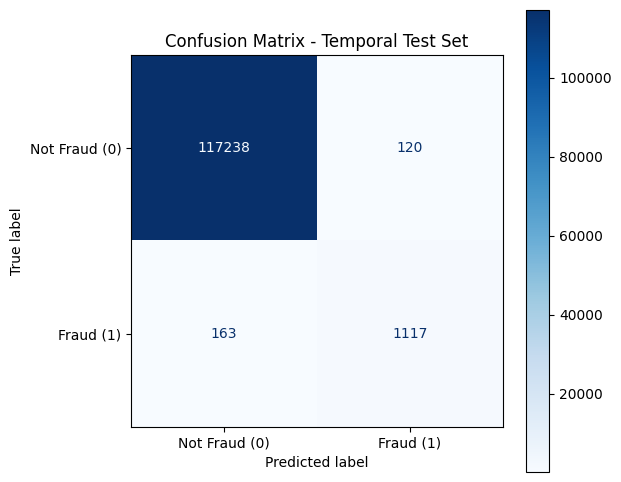

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test_temp, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud (0)", "Fraud (1)"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Temporal Test Set")
plt.show()


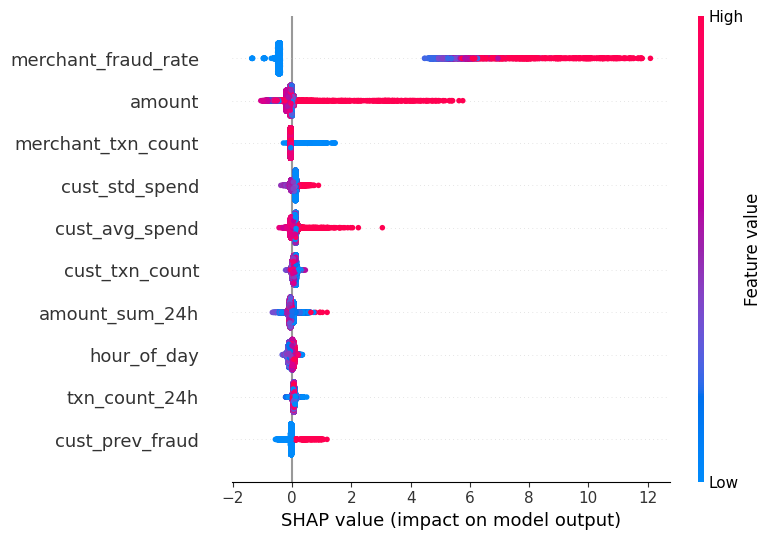

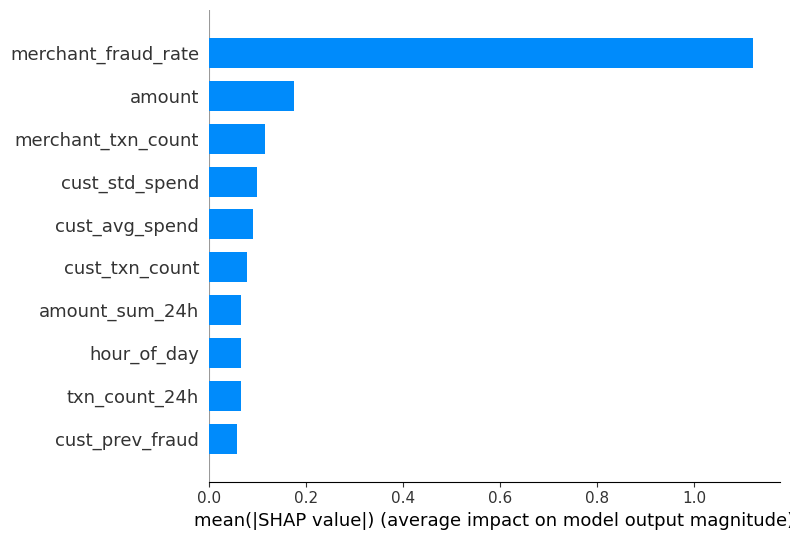

In [36]:
# Note: The numbers on the x-axis in both plots are SHAP values. 
# For the beeswarm plot, the x-axis shows the SHAP value for each transaction and feature: 
#   - A SHAP value represents the impact of that feature on the model's prediction for that transaction, measured in log-odds (for LightGBM).
#   - Positive SHAP values push the prediction toward fraud, negative values push toward not fraud.
# For the bar plot, the x-axis shows the mean absolute SHAP value for each feature:
#   - This is the average impact (regardless of direction) of that feature across all transactions.
#   - Higher values mean the feature is more important for the model's decisions.

import shap

explainer = shap.TreeExplainer(final_clf)
shap_values = explainer.shap_values(X_train_temp_model[:20000])

# Show only top 10 features in both plots
# Beeswarm plot: technical review (shows distribution and impact)
shap.summary_plot(
    shap_values, 
    X_train_temp_model[:20000], 
    plot_type="dot", 
    show=True, 
    max_display=10
)

# Bar plot: clean ranking (for executives)
shap.summary_plot(
    shap_values, 
    X_train_temp_model[:20000], 
    plot_type="bar", 
    show=True, 
    max_display=10
)

In [ ]:
import joblib

joblib.dump(final_clf, '../models/model.joblib')

['model.joblib']